# Практическая работа 4

## 1

Корреляция: -0.9999999999999998


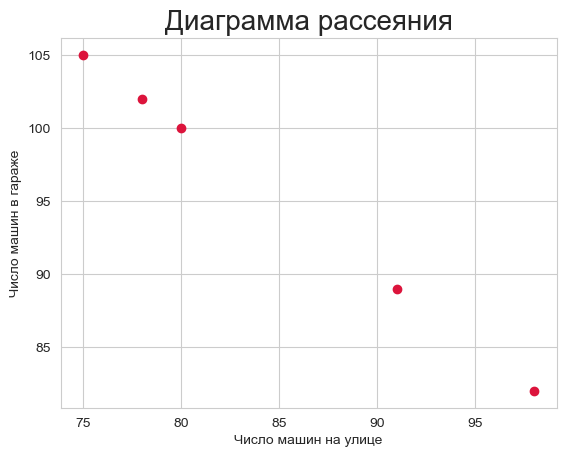

In [80]:
import matplotlib.pyplot as plt
import numpy as np

street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

print("Корреляция: "+str(np.corrcoef(street, garage)[0, 1]))

plt.grid(True)
plt.title("Диаграмма рассеяния", fontsize=20)
plt.xlabel("Число машин на улице")
plt.ylabel("Число машин в гараже")
plt.scatter(street, garage, marker="o", color='crimson')
plt.show()

## 2

In [81]:
import pandas as pd

data = pd.read_csv("./smartphones.csv", sep=",")
print(data.info())
data.drop(["brand_name", "model", "fast_charging", "processor_brand", "os"], axis=1, inplace=True)
data.dropna(inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 941 non-null    object 
 1   model                      941 non-null    object 
 2   price                      941 non-null    int64  
 3   avg_rating                 842 non-null    float64
 4   5G_or_not                  941 non-null    int64  
 5   processor_brand            922 non-null    object 
 6   num_cores                  935 non-null    float64
 7   processor_speed            899 non-null    float64
 8   battery_capacity           930 non-null    float64
 9   fast_charging_available    941 non-null    int64  
 10  fast_charging              741 non-null    float64
 11  ram_capacity               941 non-null    int64  
 12  internal_memory            941 non-null    int64  
 13  screen_size                941 non-null    float64

### 2.1

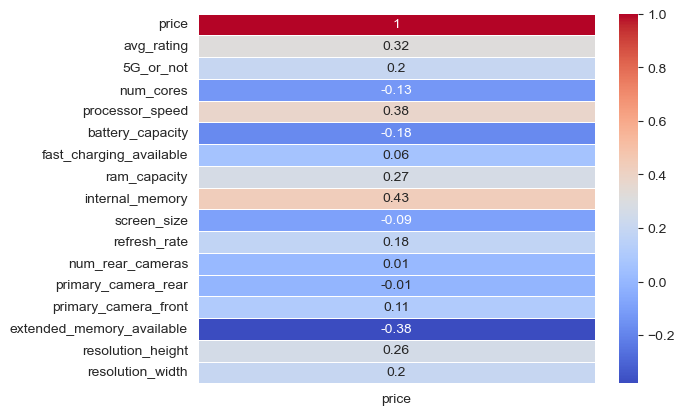

In [82]:
import seaborn as sns

corr_price = data.corr()["price"].to_frame().round(2)
sns.heatmap(corr_price, annot=True, linewidth=0.5, cmap="coolwarm")
plt.show()

### 2.2

In [83]:
from sklearn.linear_model import LinearRegression

def MSE(x, w1, w0, y):
    ypred = w1 * x[:, 0] + w0
    return np.sum((y - ypred) ** 2) / len(ypred)


def gr_MSE(x, w1, w0, y):
    ypred = w1 * x[:, 0] + w0
    return np.array([
        2 / len(x) * np.sum((y - ypred)) * (-1),
        2 / len(x) * np.sum((y - ypred) * (-x[:, 0]))
    ])


def regression(x, y):
    eps = 0.0001
    w1 = 0
    w0 = 0

    learning_rate = 0.001
    next_w1 = w1
    next_w0 = w0

    n = 10000

    for i in range(n):
        cur_w1 = next_w1
        cur_w0 = next_w0
        err = gr_MSE(x, cur_w1, cur_w0, y)
        next_w0 = cur_w0 - learning_rate * err[0]
        next_w1 = cur_w1 - learning_rate * err[0]
        print(f"Итерация {i}:")
        print(f"Текущая точка {cur_w1, cur_w0}| Следущая точка {next_w1, next_w0}")
        print(f"MSE = {MSE(x, cur_w1, cur_w0, y)}")
        print("--------------------------------------------------------------------")

        if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
            return next_w0, next_w1, MSE(x, cur_w1, cur_w0, y)
        
lin_reg = LinearRegression()
x = data[["internal_memory"]]
y = data["price"]
x = np.array(x, type(float))
y = np.array(y, type(float))

w0, w1, mse = regression(x, y)
print(f"Угол наклона = {w1}\nКоэффициент сдвига = {w0}\nMSE={mse}")

lin_reg.fit(x, y)
print(f"Угол наклона = {lin_reg.coef_[0]}\nКоэффициент сдвига = {lin_reg.intercept_}")

Итерация 0:
Текущая точка (0, 0)| Следущая точка (55.44711223203027, 55.44711223203027)
MSE = 2052174591.2030265
--------------------------------------------------------------------
Итерация 1:
Текущая точка (55.44711223203027, 55.44711223203027)| Следущая точка (96.04292871083555, 96.04292871083555)
MSE = 1574087248.9547522
--------------------------------------------------------------------
Итерация 2:
Текущая точка (96.04292871083555, 96.04292871083555)| Следущая точка (125.7653118835481, 125.7653118835481)
MSE = 1321418026.4627287
--------------------------------------------------------------------
Итерация 3:
Текущая точка (125.7653118835481, 125.7653118835481)| Следущая точка (147.5266690403081, 147.5266690403081)
MSE = 1188617324.5004172
--------------------------------------------------------------------
Итерация 4:
Текущая точка (147.5266690403081, 147.5266690403081)| Следущая точка (163.45933038015744, 163.45933038015744)
MSE = 1119364284.5006216
-----------------------------

### 2.3

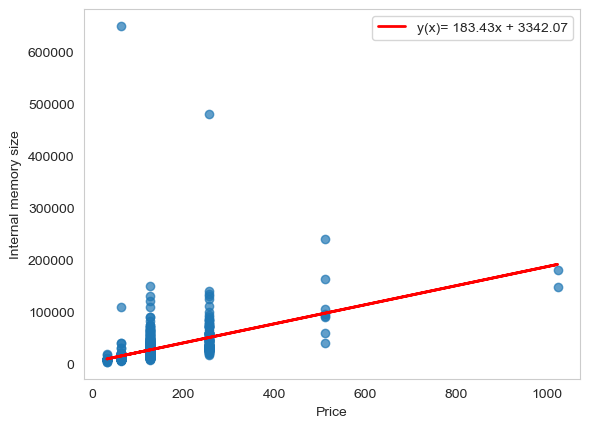

MSE = 1046833608.605025


In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

a = lin_reg.coef_[0]
b = lin_reg.intercept_
y_func = a * x + b

plt.plot(x, y_func, linewidth=2, color="r", label=f"y(x)= {a:.2f}x + {b:.2f}")
plt.scatter(x, y, alpha=0.7)
plt.grid()
plt.xlabel("Price")
plt.ylabel("Internal memory size")
plt.legend()
plt.savefig("Internal_memory-price", bbox_inches='tight')
plt.show()
mse = mean_squared_error(y, y_func)
print(f"MSE = {mse}")

## 3

In [85]:
data = pd.read_csv("./insurance.csv", sep=",")
data.head()
data.info()

data["region"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### 3.1

In [93]:
import scipy.stats as stats

southwest = data[data["region"] == "southwest"]["bmi"]
northwest = data[data["region"] == "northwest"]["bmi"]
southeast = data[data["region"] == "southeast"]["bmi"]
northeast = data[data["region"] == "northeast"]["bmi"]
print("Scipy: " + str(stats.f_oneway(southwest, northwest, southeast, northeast))) 

Scipy: F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)


pvalue = 2,91*10^-18 < 0,05 => присутствует различие; фактор региона оказывает влияение на ИМТ

### 3.2

In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("Statsmodels:")
fixed_data = data[["region", "bmi"]]
model = ols("bmi ~ region", data=fixed_data).fit()
anova_res = sm.stats.anova_lm(model, type=2)
print(anova_res)

Statsmodels:
              df        sum_sq      mean_sq          F        PR(>F)
region       3.0   4055.880631  1351.960210  39.495057  1.881839e-24
Residual  1334.0  45664.319755    34.231124        NaN           NaN


### 3.3

In [88]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("southwest-northwest")
print(stats.ttest_ind(southwest, northwest))
print("southwest-northeast")
print(stats.ttest_ind(southwest, northeast))
print("southeast-northwest")
print(stats.ttest_ind(southeast, northwest))
print("southeast-northeast")
print(stats.ttest_ind(southeast, northeast))
print("southeast-southwest")
print(stats.ttest_ind(southeast, southwest))
print("northwest-northeast")
print(stats.ttest_ind(northwest, northeast))

southwest-northwest
TtestResult(statistic=3.2844171500398582, pvalue=0.001076958496307695, df=648.0)
southwest-northeast
TtestResult(statistic=3.1169000930045923, pvalue=0.0019086161671573072, df=647.0)
southeast-northwest
TtestResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19, df=687.0)
southeast-northeast
TtestResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17, df=686.0)
southeast-southwest
TtestResult(statistic=5.908373821545118, pvalue=5.4374009639680636e-09, df=687.0)
northwest-northeast
TtestResult(statistic=0.060307727183293185, pvalue=0.951929170821864, df=647.0)


Интервалы перекрываются => различия не существенные

### 3.4

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


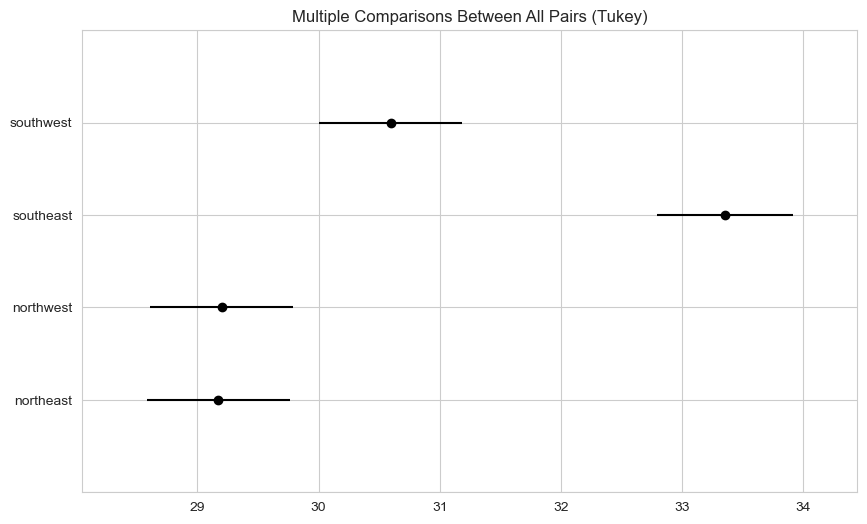

In [89]:
tukey = pairwise_tukeyhsd(endog=data["bmi"], groups=data["region"], alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())
plt.show()  # Интервалы перекрываются => различия не существенные

### 3.5

In [90]:
new_data = fixed_data = data[["region", "bmi", "sex"]]
model2 = ols("bmi ~ region + sex + region:sex", data=new_data).fit()
anova2_res = sm.stats.anova_lm(model2, typ=2)
print(anova2_res)

                  sum_sq      df          F        PR(>F)
region       4034.975135     3.0  39.398134  2.163195e-24
sex            86.007035     1.0   2.519359  1.126940e-01
region:sex    174.157808     3.0   1.700504  1.650655e-01
Residual    45404.154911  1330.0        NaN           NaN


### 3.6

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
northeast / female   northeast / male  -0.2998 0.9998 -2.2706  1.6711  False
northeast / female northwest / female  -0.0464    1.0 -2.0142  1.9215  False
northeast / female   northwest / male  -0.2042    1.0 -2.1811  1.7728  False
northeast / female southeast / female   3.3469    0.0    1.41  5.2839   True
northeast / female   southeast / male   4.6657    0.0  2.7634   6.568   True
northeast / female southwest / female   0.7362 0.9497 -1.2377    2.71  False
northeast / female   southwest / male   1.8051 0.1007 -0.1657   3.776  False
  northeast / male northwest / female   0.2534 0.9999 -1.7083  2.2152  False
  northeast / male   northwest / male   0.0956    1.0 -1.8752  2.0665  False
  northeast / male southeast / female   3.6467    0.0  1.7159  5.5775   True

<Figure size 640x480 with 0 Axes>

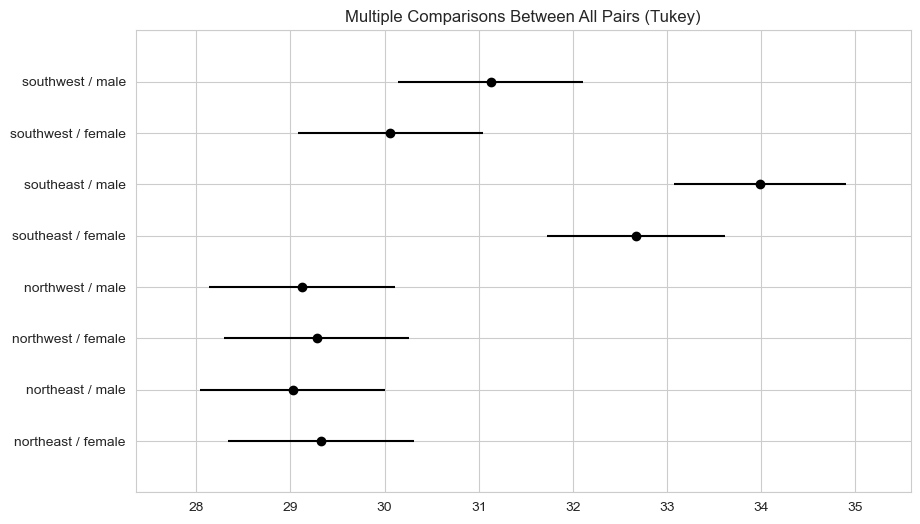

In [91]:
plt.figure()
data["combination"] = data["region"] + " / " + data["sex"]
tukey2 = pairwise_tukeyhsd(endog=data["bmi"], groups=data["combination"], alpha=0.05)
tukey2.plot_simultaneous()
print(tukey2.summary())
plt.savefig("tukey2", bbox_inches='tight')
plt.show()